# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset that you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list, which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [45, 129, 391]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns=data.keys()).reset_index(drop=True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5181,22044,21531,1740,7353,4985
1,42312,926,1510,1718,410,1819
2,2647,2761,2313,907,95,1827


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977 (5181, 42312, 2647)
* Milk: 5796.2 (22044, 926, 2761)
* Grocery: 7951.3 (21531, 1510, 2313)
* Frozen: 3071.9 (1740, 1718, 907)
* Detergents_paper: 2881.4 (7353, 410, 95)
* Delicatessen: 1524.8 (4985, 1819, 1827)

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


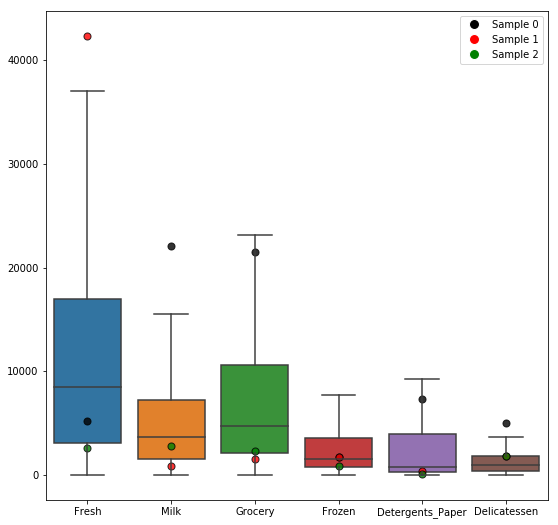

In [4]:
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(9,9))
ax = fig.gca()
ax = sns.boxplot(data=data, showfliers=False)

colors = ['k', 'r', 'g']

for i, row in samples.iterrows():
    for j, key in enumerate(samples.keys()):
        ax.scatter(j, row[key], c=colors[i], edgecolor='k', alpha=0.8, s=50)
        
black_circ = Line2D([0], [0], marker='o', color='w', label='Sample 0', markerfacecolor='k', markersize=10)
red_circ = Line2D([0], [0], marker='o', color='w', label='Sample 1', markerfacecolor='r', markersize=10)
green_circ = Line2D([0], [0], marker='o', color='w', label='Sample 2', markerfacecolor='g', markersize=10)
plt.legend(handles=[black_circ, red_circ, green_circ])

plt.show()

**Answer:**

Referring to the boxplot and mean values listed above (values in parentheses correspond to samples 0, 1, and 2), we can see that: 

Sample 0 purchases a much higher than average amount of Milk, Grocery, Detergents/Paper, and Delicatessan. It produces a lower than average amount of Fresh and Frozen goods. I could imagine that this is a cafe/deli.

Sample 1 purchases a much higher than average amount of Fresh goods, an above average amount of Delicatessen goods, an average amount of Frozen goods, and a below average amount of Milk, Grocery, and Detergents/Paper, which puts it in stark contrast to Sample 0, so it probably not a cafe/deli. This could be something like a small store that specializes in selling produce like fresh fruits and vegetables, and perhaps has a small selection of meats and other groceries/frozen meals. 

Finally, Sample 2 purchases a well below average amount of just about everything, except Delicatessen goods, which it purchases an above average amount of. Given the extremely small amount of Detergents/Paper purchased, I could imagine that this is something like a small liquor store or mom & pop convenience shop.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In the following code cell, I remove each of the features one at a time and calculate an optimized $R^2$ score using a grid search. I actually was not sure that the default parameters of SKLearn's decision tree regressor class would give a fair answer, since the model might just output a low $R^2$ if it is not optimized well. I figured that by optimizing the model, I might be able to get a better idea of which features are relevant.

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split

cols = data.columns

for col in cols:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(col, axis=1)

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[col], test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    r2 = make_scorer(r2_score)
    params = {'max_depth': [2, 3, 5, 7, 9], 'min_samples_leaf': [2, 3, 5, 7, 9]}
    regressor = DecisionTreeRegressor(random_state=42)
    grid = GridSearchCV(regressor, param_grid=params, scoring=r2).fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = grid.best_score_

    print('Predicting the values of {} using the other features yields an R^2 score of: {}'.format(col, score))

Predicting the values of Fresh using the other features yields an R^2 score of: 0.0023166130605866498
Predicting the values of Milk using the other features yields an R^2 score of: 0.1872116294713771
Predicting the values of Grocery using the other features yields an R^2 score of: 0.8070039261980836
Predicting the values of Frozen using the other features yields an R^2 score of: -0.015588974520826714
Predicting the values of Detergents_Paper using the other features yields an R^2 score of: 0.8310783236889296
Predicting the values of Delicatessen using the other features yields an R^2 score of: 0.21108720289748106


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

- I attempted to predict all of the features, though I originally chose 'Frozen' because the correlation with other parameters looked pretty weak (in the pairplot below - I checked this first instead of choosing randomly). 
- Fresh: 0.0023, Milk: 0.187, Grocery: 0.807, Frozen: -0.016, Detergents_Paper: 0.831, Delicatessen: 0.211
- Frozen does not appear to be at all predictable based on the other features, given the very low $R^2$ score of -0.016 (practically zero). Thus, I would say that it is necssary for identifying customers' spending habits. I think the same can be said of Fresh, and with Delicatessan it looks like the predictability is fairly poor. Grocery and Detergents_Paper are the two features most predictable from the others.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

<b>Note:</b> I use SNS pairplot here because it provides the same figure, but I think it looks a little prettier. Hope that's ok.

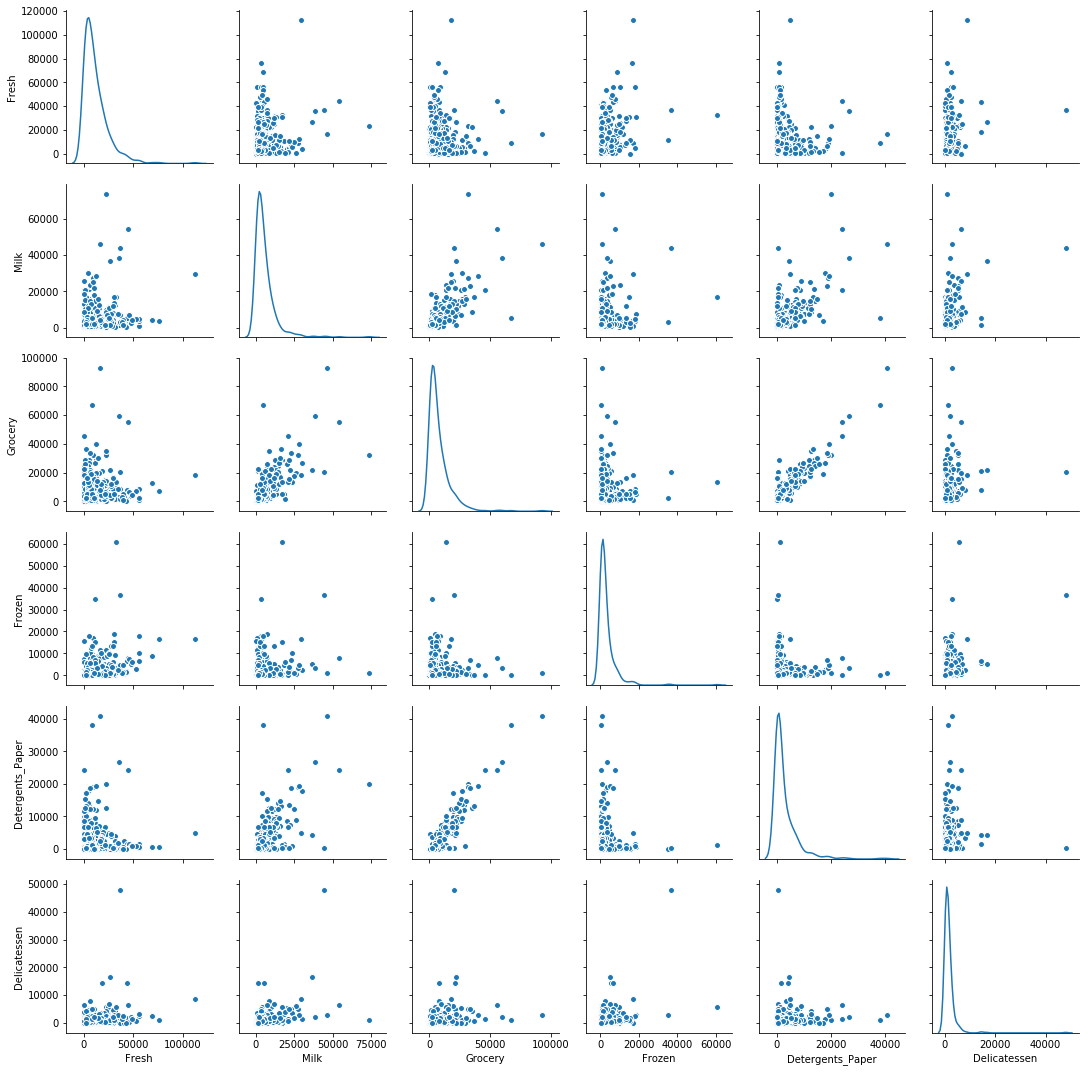

In [6]:
# Produce a scatter matrix for each pair of features in the data
# pd.plotting.scatter_matrix(data, alpha=0.3, figsize=(14,8), diagonal='kde');

sns.pairplot(data, diag_kind='kde');

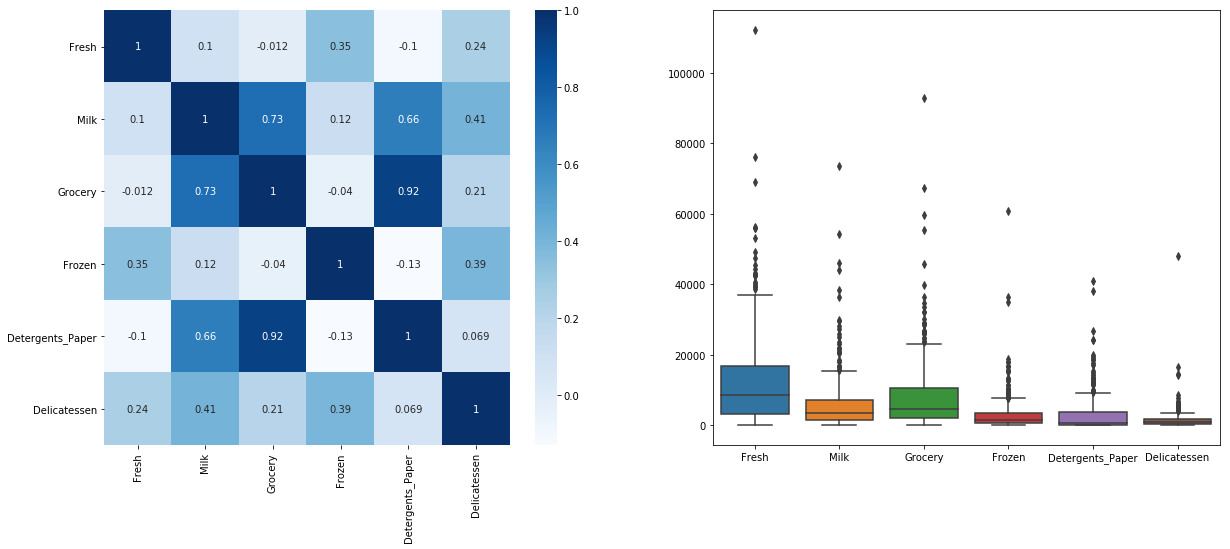

In [7]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(1, 2, 1)
ax = sns.heatmap(data.corr(), cmap='Blues', annot=True)

ax = fig.add_subplot(1, 2, 2)
ax = sns.boxplot(data=data)

plt.show()

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

- The distributions all strongly deviate from normality. It is clear that they are very sharply peaked and have a long tail extending out to large values in every case, which clearly indicates positive skew. This is confirmed in the box plots shown above, where you can see that medians and means deviate, a large number of outliers above all of the boxes, and very narrow boxes relative to the full range of the distribution.
- The pairs of features that exhibit strong correlations are: (Grocery, Detergents_Paper; r = 0.92) and (Grocery, Milk; r = 0.73). There are weaker correlations between (Milk, Detergents_Paper; 0.66), (Milk, Delicatessan; 0.41), (Frozen, Delicatessen; 0.39), and (Fresh, Frozen; 0.35).
- The feature that I attempted to predict was 'Frozen'. This seems to confirm that hypothesis that Frozen is a relevant (necessary) feautre, because it is not really strongly correlated with any of the other features. The features that resulted in large $R^2$ scores when removed all have at least one or more other features that they are strongly correlated with. For example, Grocery ($R^2$ = 0.807) and Detergents_Paper ($R^2$ = 0.831) are very highly correlated.
- The Frozen distribution is very densely packed between 700 and 3500 but extends all the way beyond 60000.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

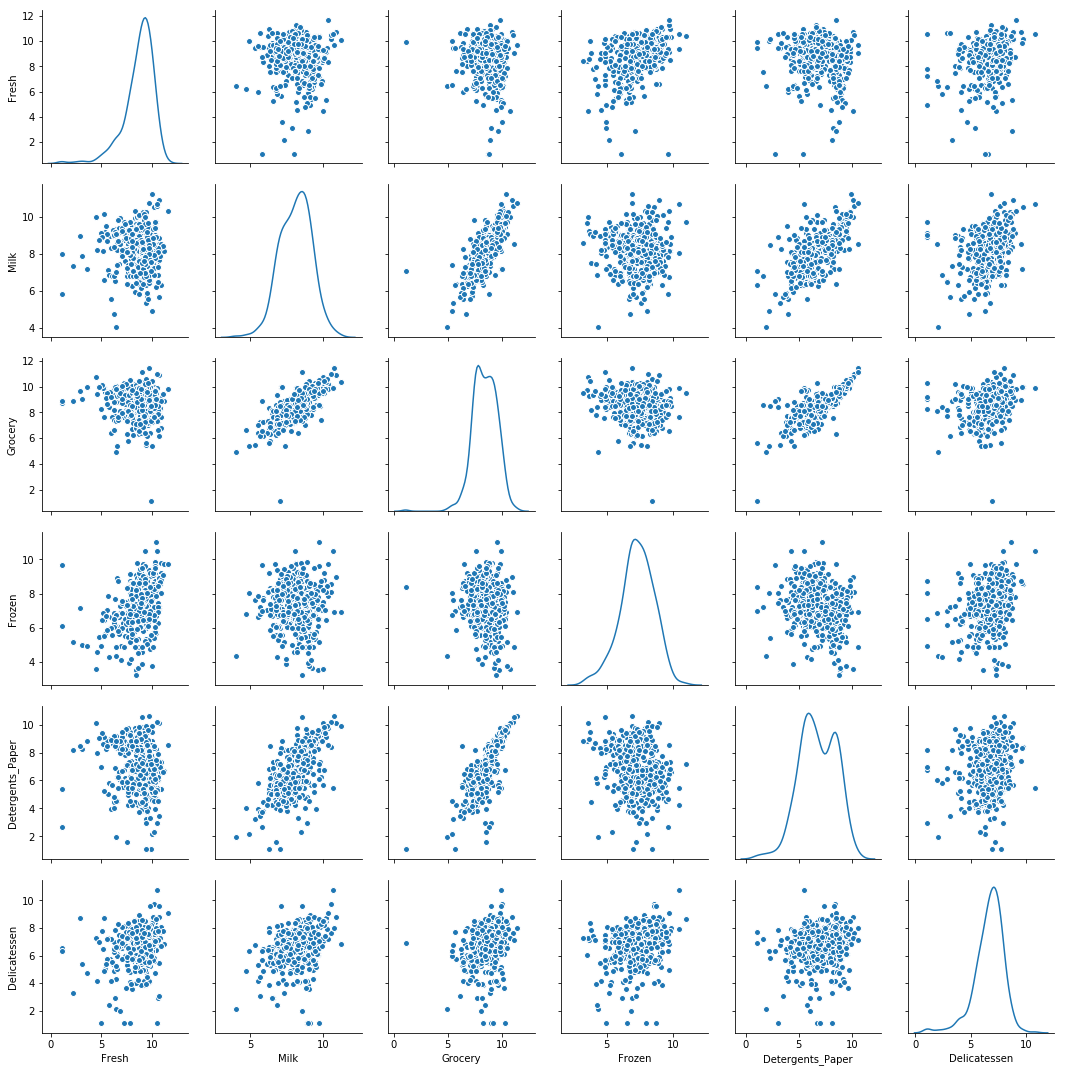

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
# pd.plotting.scatter_matrix(log_data, alpha=0.3, figsize=(14,8), diagonal='kde');

sns.pairplot(log_data, diag_kind='kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.552753,10.000796,9.977249,7.461640,8.902864,8.514189
1,10.652826,6.830874,7.319865,7.448916,6.016157,7.506042
2,7.881182,7.923348,7.746301,6.810142,4.553877,7.510431


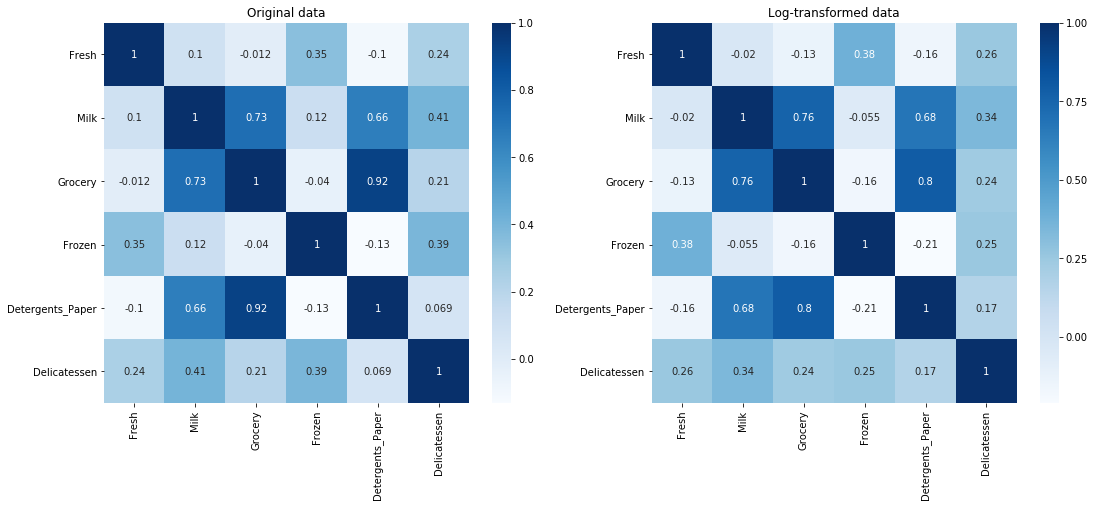

In [10]:
fig = plt.figure(figsize=(18, 7))

ax = fig.add_subplot(1, 2, 1)
ax = sns.heatmap(data.corr(), cmap='Blues', annot=True)
ax.set_title('Original data')

ax = fig.add_subplot(1, 2, 2)
ax = sns.heatmap(log_data.corr(), cmap='Blues', annot=True)
ax.set_title('Log-transformed data')

plt.show()

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results that take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
def outliers(remove='multi'):

    # OPTIONAL: Select the indices for data points you wish to remove
    outliers  = []
    multi_feat_outliers = []
    extreme_outliers = []

    # For each feature find the data points with extreme high or low values
    for feature in log_data.keys():

        # TODO: Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(log_data[feature], 25)

        # TODO: Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(log_data[feature], 75)

        # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = 1.5 * (Q3 - Q1)
        
        # Use the IQR to calculate the extreme outliers
        extreme = 3.0 * (Q3 - Q1)

        # Calculate indices to drop and append to outliers and extreme_outliers lists
        outlier_indices = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
        extreme_outlier_indices = log_data[~((log_data[feature] >= Q1 - extreme) & (log_data[feature] <= Q3 + extreme))].index.tolist()
        
        for index in outlier_indices:
            if index not in outliers:
                outliers.append(index)
            elif index not in multi_feat_outliers:
                multi_feat_outliers.append(index)
                
        extreme_outliers += extreme_outlier_indices
                
        # Display the outliers
        print("Data points considered outliers for the feature '{}':".format(feature))
        display(log_data.iloc[outlier_indices])
    
    if remove == 'multi':
        # Remove the multi-feature outliers
        good_data = log_data.drop(log_data.index[multi_feat_outliers]).reset_index(drop=True)
        print('{} multi-feature outliers were removed.'.format(len(multi_feat_outliers)))
        return good_data, outliers, multi_feat_outliers, extreme_outliers
    
    elif remove == 'extreme':
        # Remove the extreme outliers
        good_data = log_data.drop(log_data.index[extreme_outliers]).reset_index(drop=True)
        print('{} extreme outliers were removed.'.format(len(extreme_outliers)))
        return good_data, outliers, multi_feat_outliers, extreme_outliers
    
    else:
        # Don't remove any outliers
        good_data = log_data.copy()
        print('No outliers were removed.')
        return good_data, outliers, multi_feat_outliers, extreme_outliers

In [12]:
good_data, outliers, multi_feat_outliers, extreme_outliers = outliers(remove='multi')

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


5 multi-feature outliers were removed.


In [13]:
print('There are {} single-feature outliers.'.format(len(outliers)))
print('The following samples are outliers for multiple features:', multi_feat_outliers)
print('The following samples are extreme outliers:', extreme_outliers)
print('There are {} samples in the good_data dataframe.'.format(len(good_data)))

There are 42 single-feature outliers.
The following samples are outliers for multiple features: [154, 65, 75, 66, 128]
The following samples are extreme outliers: [66, 95, 218, 338, 75, 109, 128, 142, 187]
There are 435 samples in the good_data dataframe.


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

- There are 5 data points that are outliers for multiple features: [154, 65, 75, 66, 128]
- To be honest, I would be most comfortable removing 154 because it is an outlier for three features, so I can imagine that the data was mis-entered, but for the other four points (outliers for two features), it is less clear whether this is appropriate.
- I decided to go ahead and remove the 5 outliers that are outliers for multiple features because it isn't a lot of data to throw away, and as mentioned above, it is possible that the data were mislabeled. I did not want to throw away all 47 outliers (42 single-feature outliers + 5 multi-feature outliers) because it is a large percentage of the dataset and it is less believable that the single-feature outliers were mislabeled.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions of the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

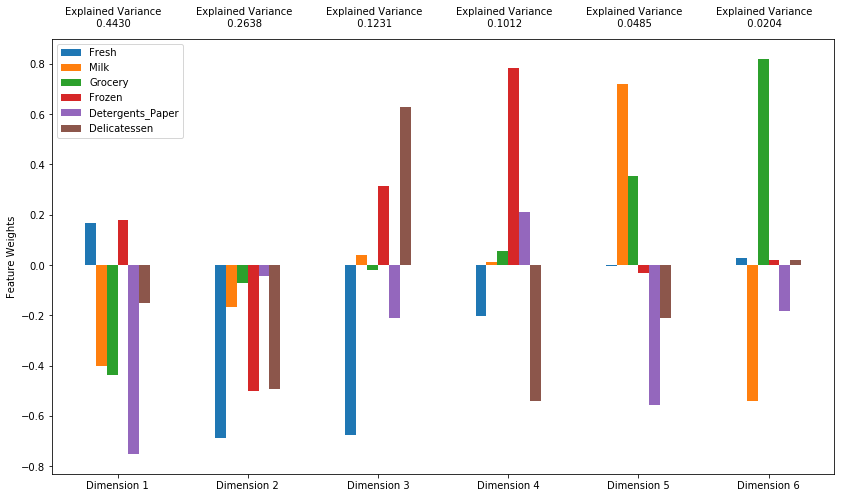

In [14]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6, random_state=42).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [15]:
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_
explained_var_ratio = eigenvalues / np.sum(eigenvalues)

for i in range(len(eigenvectors)):
    print('Eigenvalue {} has eigenvector: {}'.format(eigenvalues[i], eigenvectors[i]))

print('\nExplained variance ratios:', explained_var_ratio)

Eigenvalue 4.548840006652701 has eigenvector: [ 0.16746374 -0.40143866 -0.43811142  0.17820975 -0.75142613 -0.14987105]
Eigenvalue 2.708534074348643 has eigenvector: [-0.68593522 -0.16722783 -0.07072902 -0.50054207 -0.04244398 -0.49414702]
Eigenvalue 1.263579892450693 has eigenvector: [-0.67738927  0.04020501 -0.01953317  0.31504299 -0.21170161  0.62855082]
Eigenvalue 1.0391825604600606 has eigenvector: [-0.204293    0.01281068  0.05567564  0.78544905  0.20961368 -0.54233972]
Eigenvalue 0.49800270797809054 has eigenvector: [-0.00261356  0.71923846  0.3553861  -0.0330861  -0.55815441 -0.20918629]
Eigenvalue 0.20954208319188236 has eigenvector: [ 0.02915623 -0.54018269  0.82053348  0.02054106 -0.18238824  0.01974794]

Explained variance ratios: [0.44302505 0.26379218 0.1230638  0.10120908 0.04850196 0.02040793]


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension (both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

The first and second PCs explain (44.3% + 26.4%) = 70.7% of the variance in the data.

The first four PCs explain (44.3% + 26.4% + 12.3% + 10.1%) = 93.1% of the variance in the data.

PC1 is the most important (largest eigenvalue -> largest explained variance) "new" direction. As we can see from the eigenvector [0.16746374 -0.40143866 -0.43811142  0.17820975 -0.75142613 -0.14987105] displayed visually in the plot and printed above, four of the components (corresponding to features 2, 3, 5, and 6; Milk, Grocery, Detergents/Paper, Delicatessen) are negative, and two of the components (corresponding to features 1 and 4; Fresh and Frozen) are positive. Note that the first eigenvector could have just as easily been chosen as [-0.16746374 0.40143866 0.43811142  -0.17820975 0.75142613 0.14987105]; in this case, the other 5 eigenvectors would be multiplied by -1 as well. Given this flexibility, what is important then is the relative signs of the components. 

Now, the features best represented by PC1 are Milk, Grocery, and Detergents/Paper, because they have largest components in the eigenvector. Why do large components mean better representation? Well, I guess since the eigenvectors are orthonormal, one can interpret the squares of the coefficients to be like percentages signifying the representation of that feature in a given PC. For PC1, we have:

$0.167^2 + (-0.401)^2 + (-0.438)^2 + (0.178)^2 + (-0.751)^2 + (-0.150)^2) = 0.028 + 0.161 + 0.192 + 0.0317 + 0.564 + 0.023 = 1$. 

Thus, we can see that Milk, Grocery, and Detergents/Paper have squared coefficients of 16.1%, 19.2%, and 56.4%, which collectively add to 91.7%. Finally, based on the above, we can expect data points (in the original feature space) with large magnitudes in these features to have large, negative values in the PC1 dimension. To elaborate a bit more, the way to calculate PC1 for a given data point is to take the dot product of the PC1 eigenvector and the feature vector representing the data point:

PC1 = eigenvector 1 $\cdot$ feature vector = $(0.167 \times Fresh) + (-0.401 \times Milk) + (-0.438 \times Grocery) + (0.178 \times Frozen) + (-0.751 \times Detergents/Paper) + (-0.150 \times Delicatessen)$

Note that in the original feature space, all of the values are positive. It is easy then to see that large values for Milk, Grocery, and Detergents/Paper (and at least not extremely large values for Fresh and Frozen) will lead to a large, negative PC1. To obtain a large, positive value for PC1 the data point would need to have large values for Fresh and Frozen and small values for Milk, Grocery, Detergents/Paper, and Delicatessen.

Similar reasoning can be applied for each of the other five PCs, so I'll just summarize: The largest features weights for PC2 are -0.69 (Fresh), -0.50 (Frozen), and -0.49 (Delicatessan), so these three features are well represented by this PC. PC2 is not as important as PC1 because its eigenvalue is smaller (smaller explained variance), but it does account for >25% of the explained variance, so it is quite important. The features best repesented by PCs 3, 4, 5, and 6 are (Fresh / Frozen, Delicatessen), (Frozen / Delicatessen), (Milk, Grocery / Detergents/Paper), and (Grocery / Milk), respectively, where the "/" separates components of opposite sign. 

The first four PCs explain 93% of the variance, which means that not much information is lost by not including PCs 5 and 6. What the first four PCs represent in terms of customer spending is summarized in the table below. Filled cells correspond to relatively important features for a given PC, and blank cells indicate features that are relatively unimportant for a given PC. A \$\$\$ denotes a large amount of spending, while a \$ denotes a small amount of spending. For example, a large, negative PC1 indicates that a customer spent a large amount on Milk, Grocery, and Detergents/Paper, and a large positive PC1 indicates that a customer spent very little in those categories (or perhaps an extremely large amount on Fresh, Frozen, since those feature weights are positive, but small). Note that if the eigenvector directions were reversed, the \$\$\$ and the \$ signs in any given PC row would need to be reversed.

<img src='fig1.jpg' height=80%, width=80%>

We can observe this behavior in the two tables below. For example, Sample 0 has a large negative PC1, and indeed this customer spent a lot on Milk, Grocery, and Detergents/Paper. Samples 1 and 2 both have positive values because they spent little in these categories. Note that Sample 2 has a positive value for PC3 (the most positive of the three), even though spending in Frozen and Delicatessan was not particularly high (no higher than Sample 0 in any case, which also has a positive PC3 value). This might be because of the extremely low spending of this customer on Detergents/Paper (which has a negative feature weight for PC3).  

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [16]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns=pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-3.2813,-1.3308,0.9322,-0.2862,0.3269,-0.1179
1,1.8251,-1.4262,-0.5925,-0.9721,-1.0804,-0.0185
2,1.7199,0.6417,1.4317,-1.1788,0.7006,-0.0858


In [17]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5181,22044,21531,1740,7353,4985
1,42312,926,1510,1718,410,1819
2,2647,2761,2313,907,95,1827


In [18]:
reduced = log_samples - good_data.mean(axis=0)

In [19]:
np.dot(reduced, pca.components_.T)

array([[-3.28131752, -1.33084252,  0.93219938, -0.28618792,  0.32690498,
        -0.11789148],
       [ 1.82509896, -1.42623811, -0.5924665 , -0.97210802, -1.08037111,
        -0.01846604],
       [ 1.71986369,  0.64170615,  1.43169281, -1.17876128,  0.70056609,
        -0.08583917]])

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [20]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, random_state=42).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [21]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns=['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-3.2813,-1.3308
1,1.8251,-1.4262
2,1.7199,0.6417


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

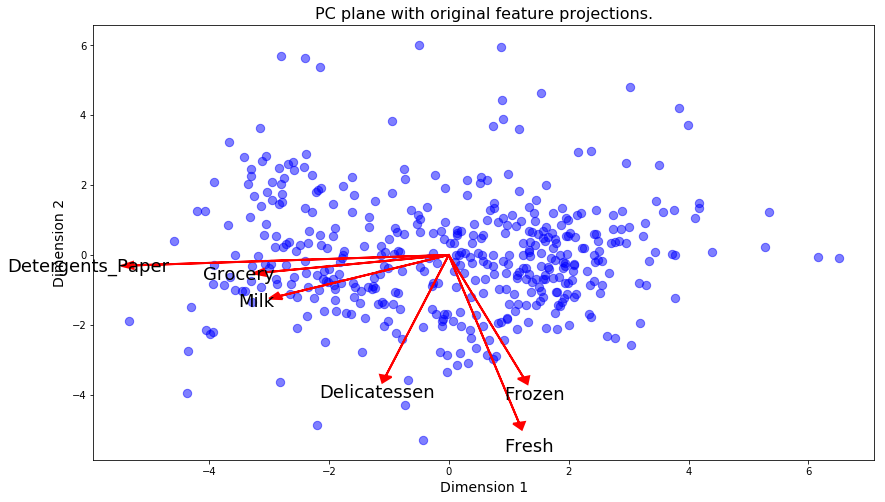

In [22]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point in the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

** Answer: **

The original features most strongly correlated with the first components are Detergents/Paper, Grocery, and Milk. The features that are associated with the second component are Delicatessen, Frozen, and Fresh. 

This agrees with the PCA plot from above. There, we can see that the feature weights are (Fresh, Milk, Grocery, Frozen, Detergents/Paper, Delicatessan):

- PC1: [0.16746374, -0.40143866, -0.43811142,  0.17820975, -0.75142613, -0.14987105]
- PC2: [-0.68593522, -0.16722783, -0.07072902, -0.50054207, -0.04244398, -0.49414702]

The only other thing I want to mention is that, in my case, it really does not seem like (as written above) "a point in the <u>lower right corner</u> of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories." It seems to be the opposite for me, I guess because my execution of PCA returned feature weights for Detergents/Paper, Grocery, and Milk that are negative for PC1 and feature weights for Fresh, Frozen, and Delicatessen that are negative for PC2. So, I would say that, at least here, a point in the lower right actually corresponds to someone that spends very **little** on both `'Milk'`, `'Grocery'` and `'Detergents_Paper'` and the other product categories. Had the signs of the feature weights been inverted, I believe the vectors shown in the figure above would be reversed compared to their current directions, and the statement at the top of this cell would be true.

In fact, as shown later in the notebook, the data will cluster into two clusters based on a nearly vertical line close to Dim1 = 0. One of my three samples will fall into the left cluster, and two will fall into the right cluster. The sample that falls into the left cluster is the one that spends a very large amount on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, and the two samples that fall into the right cluster spend very little on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

- K-means is a relatively simple and intuitive algorithm, and it works well when we have well-defined circular clusters with well-separated means. It is also relatively fast.
- A GMM gives us more flexibility than k-means. The clusters can be elliptical because we are able to employ a full covariance matrix rather than just a diagonal one (as is the case for k-means). Moreover, we aren't restricted to data points being assigned to only a single cluster, but can be assigned to multiple clusters with corresponding probabilities. 
- I am going to try GMM because I find it unlikely that we are going to end up with nicely defined, well-separated clusters (especially based on the plot above) and I like the idea of being able to assign data points to multiple clusters for this particular application. To elaborate, let's say we go with k-means. You can imagine a particular data point that lies close to two different clusters, say cluster A and cluster B (and maybe it even happens to fall into one particular cluser or another depending on the intialization). Let's say these two clusters correspond to service packages A and B that you are thinking of providing. You may not end up providing that customer with the best service that fits their needs. In other words, it may be the case that you want to provide a blend of services A and B. It really depends on what the ultimate goal is, but at least with GMM, it leaves more room for customization like that described.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [23]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def find_best_n(num_trials=20):

    n_components = np.array([2, 3, 4, 5, 6])
    mean_scores = np.zeros((1,5))
    best_n = []
    
    for i in range(num_trials):
        scores = []
        for n in n_components:
            # TODO: Apply your clustering algorithm of choice to the reduced data 
            clusterer = GaussianMixture(n_components=n, n_init=10).fit(reduced_data)

            # TODO: Predict the cluster for each data point
            preds = clusterer.predict(reduced_data)

            # TODO: Find the cluster centers
            centers = None

            # TODO: Predict the cluster for each transformed sample data point
            sample_preds = clusterer.predict(pca_samples)

            # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
            score = silhouette_score(reduced_data, preds)
            scores.append(score)
        
        scores = np.array(scores)
        mean_scores += scores
        best_n.append(n_components[np.argmax(scores)])
        
    mean_scores /= num_trials
    
    print('Out of {} trials, the following number of clusters produced the best results:'.format(num_trials))
    print()
    print('n=2: {} times with a mean silhouette score of {}'.format(best_n.count(2), mean_scores[0][0]))
    print('n=3: {} times with a mean silhouette score of {}'.format(best_n.count(3), mean_scores[0][1]))
    print('n=4: {} times with a mean silhouette score of {}'.format(best_n.count(4), mean_scores[0][2]))
    print('n=5: {} times with a mean silhouette score of {}'.format(best_n.count(5), mean_scores[0][3]))
    print('n=6: {} times with a mean silhouette score of {}'.format(best_n.count(6), mean_scores[0][4]))
    
    plt.scatter(n_components, mean_scores)
    plt.xlabel('n_components')
    plt.ylabel('Silhouette score')
    plt.title('Number of trials: ' + str(num_trials))
    plt.show()

Out of 20 trials, the following number of clusters produced the best results:

n=2: 20 times with a mean silhouette score of 0.4219168464626149
n=3: 0 times with a mean silhouette score of 0.39683213745416257
n=4: 0 times with a mean silhouette score of 0.31571107951302596
n=5: 0 times with a mean silhouette score of 0.28991504591423123
n=6: 0 times with a mean silhouette score of 0.26961980016261045


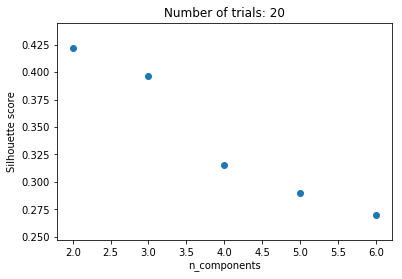

In [24]:
find_best_n()

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

The silhouette scores were calculated from the average values of 20 trials (10 initializations each) to be:

- n=2: 0.42191684646261496
- n=3: 0.40357096382490487
- n=4: 0.31951340342643897
- n=5: 0.301302032196699
- n=6: 0.2827751147699477

Two clusters provides the best silhouette score. In the 20 trials performed, n=2 consistently gave the highest silhouette score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [25]:
# Get cluster centers (skipped above)

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2, n_init=10, random_state=1).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

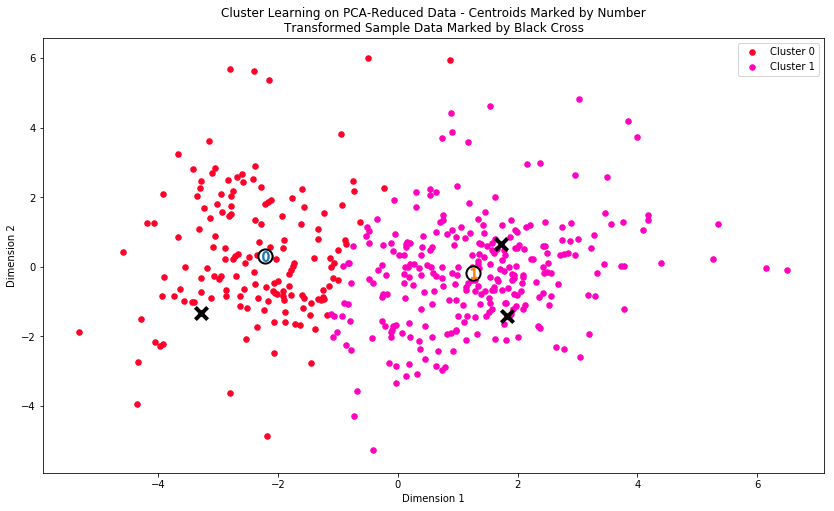

In [26]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [27]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0, len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
true_centers = true_centers.append(data.mean(), ignore_index=True)
true_centers['Sum'] = true_centers.sum(axis=1)
true_centers.rename(index={0: 'Segment 0', 1: 'Segment 1', 2: 'Mean'}, inplace=True)
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Sum
Segment 0,3552.000000,7837.000000,12219.000000,870.000000,4696.000000,962.000000,30136.000000
Segment 1,8953.000000,2114.000000,2765.000000,2075.000000,353.000000,732.000000,16992.000000
Mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364


In [36]:
centers.shape

(2, 2)

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project (specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Looking at the above table, what really stands out is that Segment 1 customers spend lower than the mean value in each of the product categories, and that Segment 0 customers spend lower than the mean value in Fresh, Frozen, and Delicatessan. This means that the what really separates the two segements is spending in the other three categories, namely Milk, Grocery, and Detergents/Paper, where Segment 0 customers spend above the average. Another thing that stands out is that Segment 0 customers spend nearly twice as much annually compared to Segment 1 customers across all product categories.

Of course this is just a guess, but I could imagine that Segment 0 customers are cafes/restaurants, because such establishments would require significant amounts of Milk, Grocery, and Detergents/Paper, while Segment 1 customers might be something like convenience stores or produce stands, as indicated by the lower amount of total annual spending, and the higher proportion of Fresh and Frozen goods purchased. 

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [28]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

Sample 0 is best represented by Segment 0 (Cluster 0), and Samples 1 and 2 are best represented by Segment 1 (Cluster 1). The original predictions for these samples were cafe, small grocer, and convenience store/mom & pop shop, which seem to be consistent with the the resulting segmentation.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

We should not assume that the change will affect all customers equally. For example, if we go with the running hypothesis that Segment 1 represents grocers and convenience stores, and that Segment 0 represents cafes/restaurants, it is at least plausible that the Segment 0 customers will not react positively to the reduced frequency of deliveries, as they may rely on frequent deliveries to replentish stocks that are constantly being depleted. The distributor could try the new delivery service on a randomly selected group of customers in the two segments and see if there is any indication that the results reflect the segementation identified by the PCA analysis above.

I would guess that the Segment 0 customers would react negatively to the reduction in delivery service from 5 to 3 days. These customers purchase the largest amounts of Milk, Grocery, and Detergents/Paper, which are items that are likely consumed quickly. On the other hand, the Segment 1 customers purchase a larger amount of Fresh goods, which may be perishable and need to be quickly sold and re-stocked. The only way to be sure would be to try or survey, but if the trends in positive/negative reactions clearly indicated a separation corresponding to the predicted PCA segementation, then that would be evidence that customers in the two segments have similar needs.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

In this case, perhaps the most straightforward method is to apply the PCA transform to the new data and visually look to see if falls closer to cluster 0 or cluster 1. 

But, supervised learning could be carried out in the following way:

- Assign labels to all of the current customers (0 or 1, depending on which cluster they ended up in). In other words, the target variable is the segment (cluster) assignment.
- Train a logistic regression (or some other) classifier to predict labels for new customers.

In [29]:
# Logistic regression/Support vector machine

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = data.copy().drop(data.index[multi_feat_outliers])
df['Target'] = preds

X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
svc = SVC(kernel='linear', random_state=42).fit(X_train, y_train)

train_preds_logit = clf.predict(X_train)
train_preds_svc = svc.predict(X_train)
train_accuracy_logit = accuracy_score(y_train, train_preds_logit)
train_accuracy_svc = accuracy_score(y_train, train_preds_svc)

test_preds_logit = clf.predict(X_test)
test_preds_svc = svc.predict(X_test)
test_accuracy_logit = accuracy_score(y_test, test_preds_logit)
test_accuracy_svc = accuracy_score(y_test, test_preds_svc)

print('Training set accuracy (lr):', train_accuracy_logit)
print('Training set accuracy (svc):', train_accuracy_svc)
print('Test set accuracy (lr):', test_accuracy_logit)
print('Test set accuracy (svc):', test_accuracy_svc)

Training set accuracy (lr): 0.9325153374233128
Training set accuracy (svc): 0.9662576687116564
Test set accuracy (lr): 0.926605504587156
Test set accuracy (svc): 0.963302752293578


The support vector machine is a little more accurate, so let's go with that.

In [31]:
def predict_segment(sample, classifier=svc):
    
    prediction = classifier.predict(sample)
    print('The customer likely belongs to Segment', prediction[0])

In [32]:
predict_segment([[10000, 7000, 9000, 1000, 8000, 600]])

The customer likely belongs to Segment 0


In [33]:
predict_segment([[5000, 300, 1000, 20, 2000, 600]])

The customer likely belongs to Segment 1


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

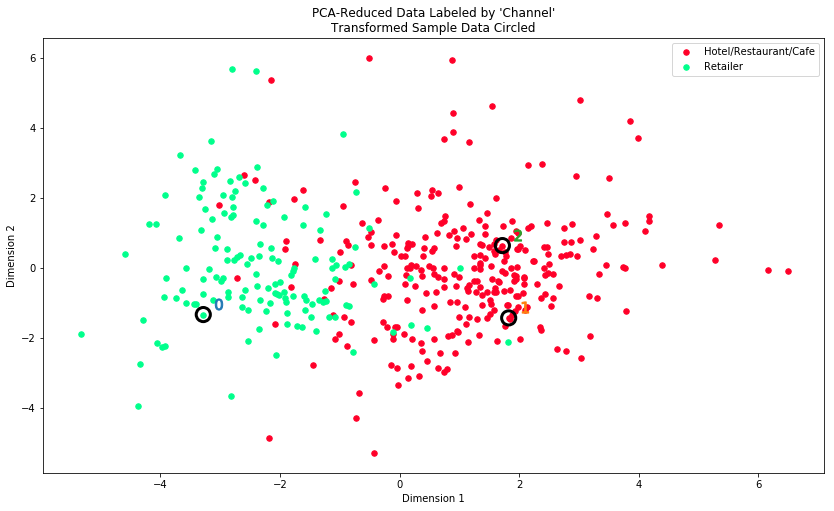

In [34]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, multi_feat_outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

- The result of the clustering algorithm and the labeling based on 'Channel' match up fairly well, although the clustering algorithm does not identify some of the red points that 'bleed' into the green region and vice versa. I actually had hoped that the Gaussian mixture model would be able to handle such points. In any case, we see the same sort of vertical boundary at Dim1 $\approx$ 0, although it is much softer. The clusters certainly do overlap here. 
- I suppose that if you were pressed to identify customer segments that would classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes', these would be the ones in regions where you don't see any overlap of data points. So, for points that fall into the regions Dim1 < -3 and Dim1 > 2, you might be able to say those are purely one or the other.
- Visually it looks fairly consistent. Below is some code that shows that roughly 90% of the data points clustered by the PCA/GMM clustering are consistent with the previous definition of customer segments. 

In [35]:
full_data = pd.read_csv("customers.csv")
channel = pd.Series(full_data['Channel'])
channel = channel.drop(channel.index[multi_feat_outliers])
channel = channel.map({2: 0, 1: 1})
accuracy_score(preds, channel)

0.9011494252873563

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.